# Trabajo Práctico Nro 1 - Redes Neuronales, ITBA 2023
Autor: Pablo Smolkin

Legajo 59523
***

# Problema de Regresión
Se trabajará con el dataset MNIST.
Se utilizará información adicional obtenida de https://github.com/dccastro/Morpho-MNIST
(original MNIST morphometrics) la cual indica para cada imagen distintas características
como ser largo del trazo, inclinación del número, ancho del trazo, etc.
Para acceder a los datos es necesario tener instalado tensorflow, y descargados los archivos
con los metadatos (disponibles en campus).

En este problema intentaremos predecir la inclinación del número en función de:

a. La imagen

b. La imagen y el label al que pertenece (Utilizando embeddings de tamaño 2)

c. La imagen y una variable continua más a elección (a partir de lo visto en el EDA)

## Imports

In [1]:
from mlp_helper import *
from tensorflow.keras.datasets import mnist
import pandas as pd
(x_train, y_train) , (x_test, y_test) = mnist.load_data()
train_morpho = pd.read_csv("../../AssignmentGoodies/Metadatos MNIST/train-morpho.csv")
test_morpho = pd.read_csv("../../AssignmentGoodies/Metadatos MNIST/t10k-morpho.csv")
print("Train shape: ", x_train.shape)
print("Test shape: ", x_test.shape)

Train shape:  (60000, 28, 28)
Test shape:  (10000, 28, 28)


EDA: Histogramas de inclinación para cada clase. Scatters entre la inclinación y los otros descriptores morfológicos.

Class 0: 5923 instances
Class 1: 6742 instances
Class 2: 5958 instances
Class 3: 6131 instances
Class 4: 5842 instances
Class 5: 5421 instances
Class 6: 5918 instances
Class 7: 6265 instances
Class 8: 5851 instances
Class 9: 5949 instances


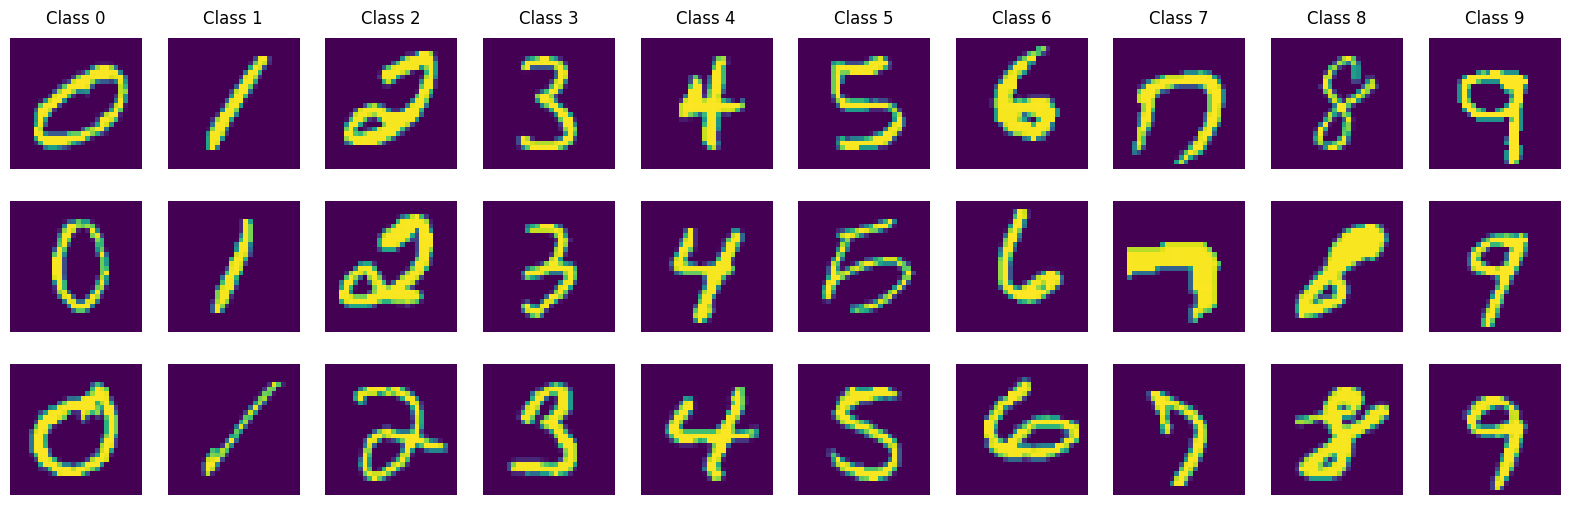

Promedio de brillo de cada clase


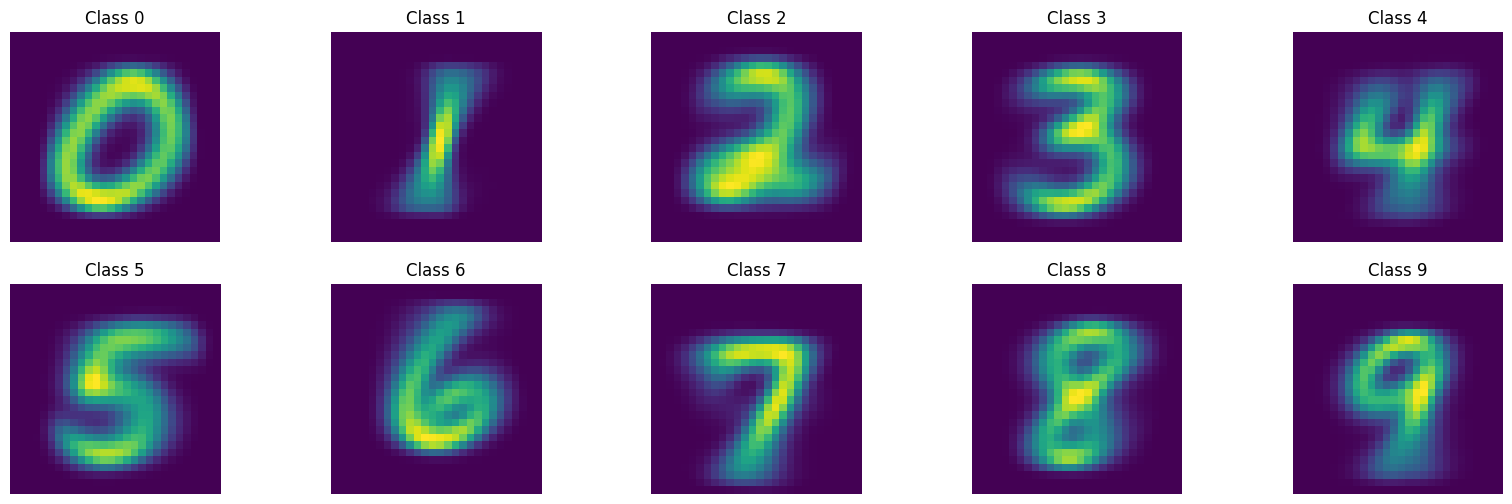

Histogramas de brillo de cada clase


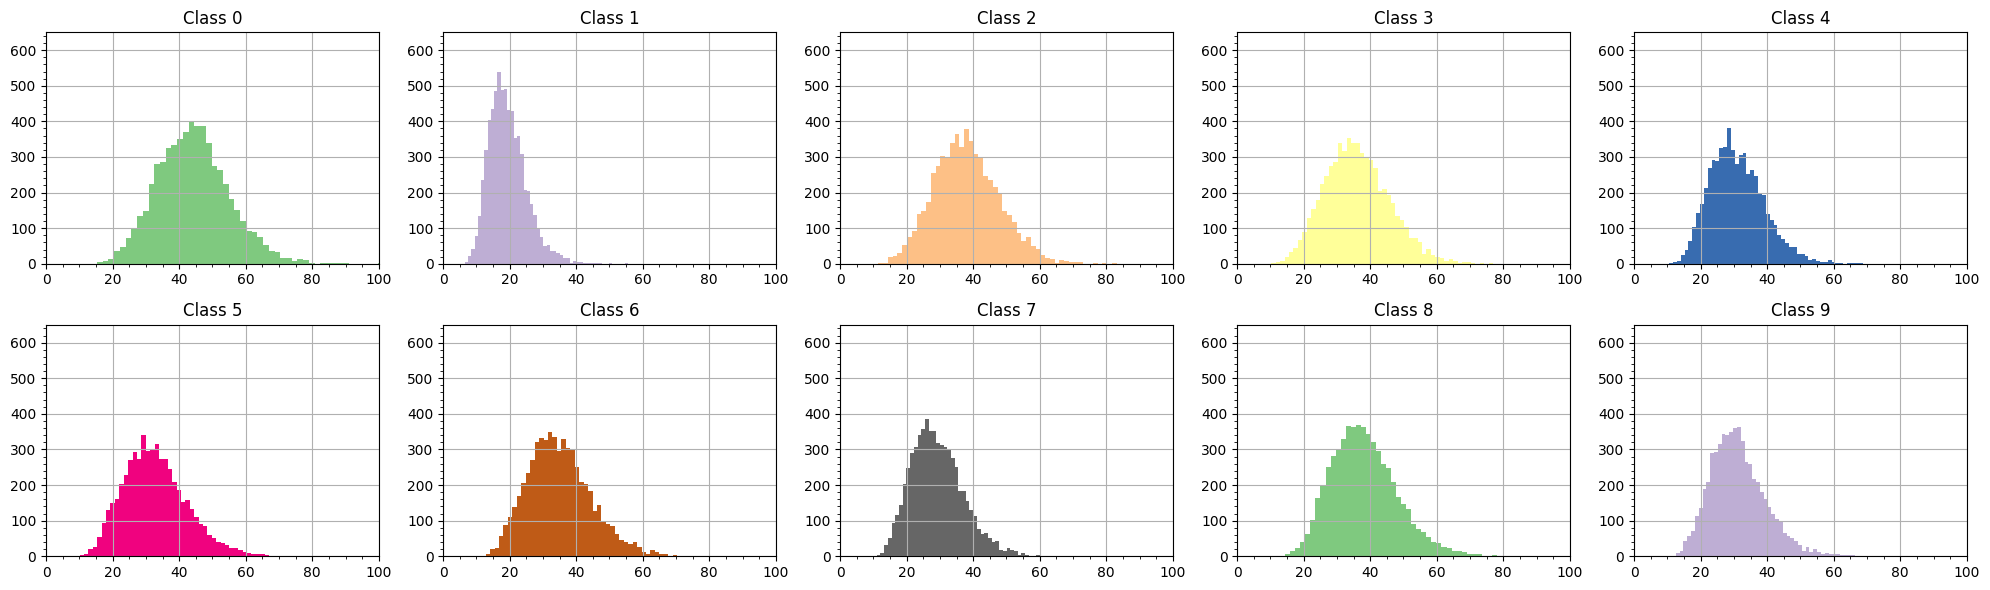

Histogramas de inclinación de cada clase


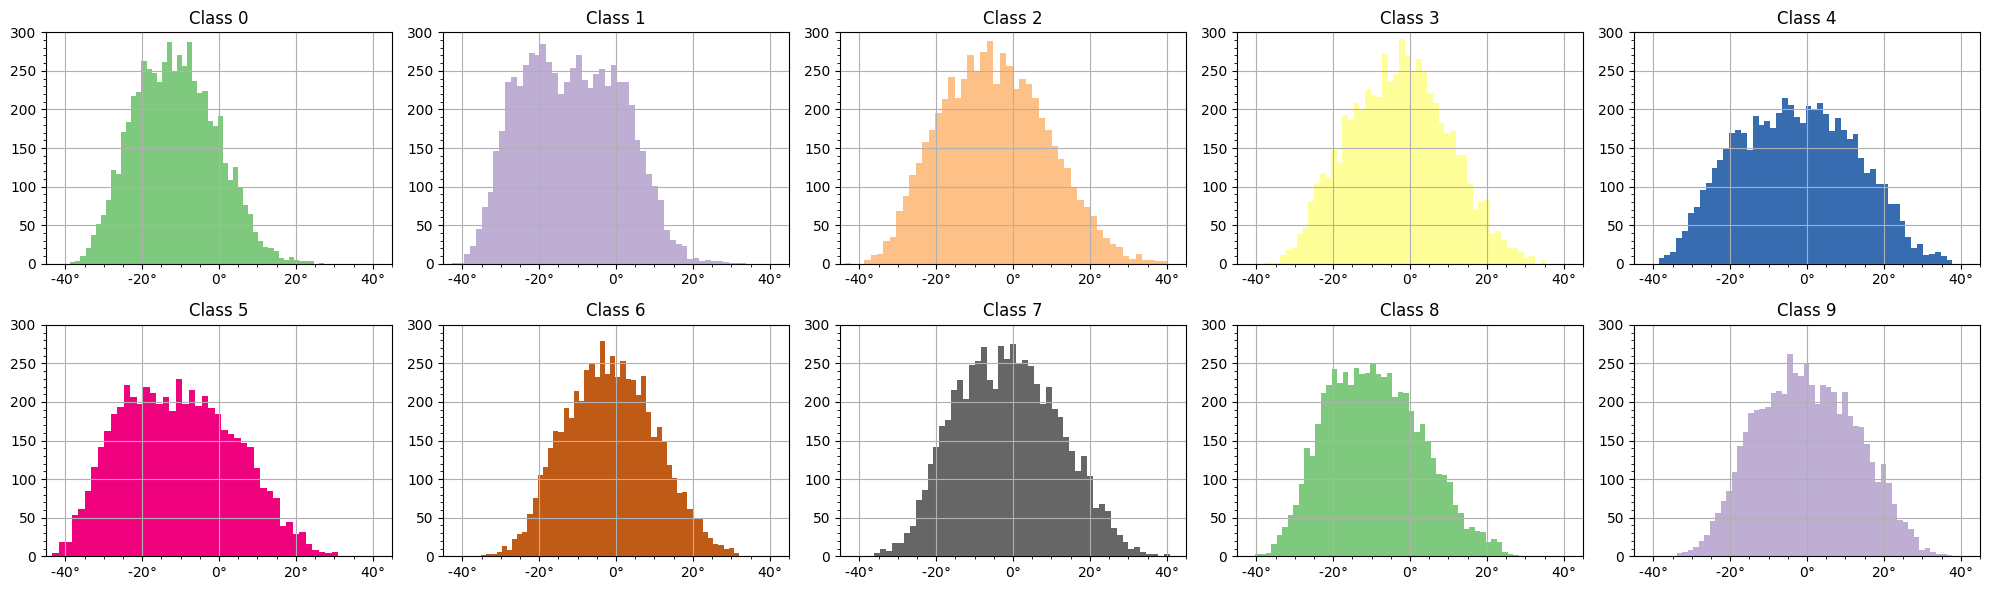

Scatter entre slant y las otras variables morfológicas de cada clase


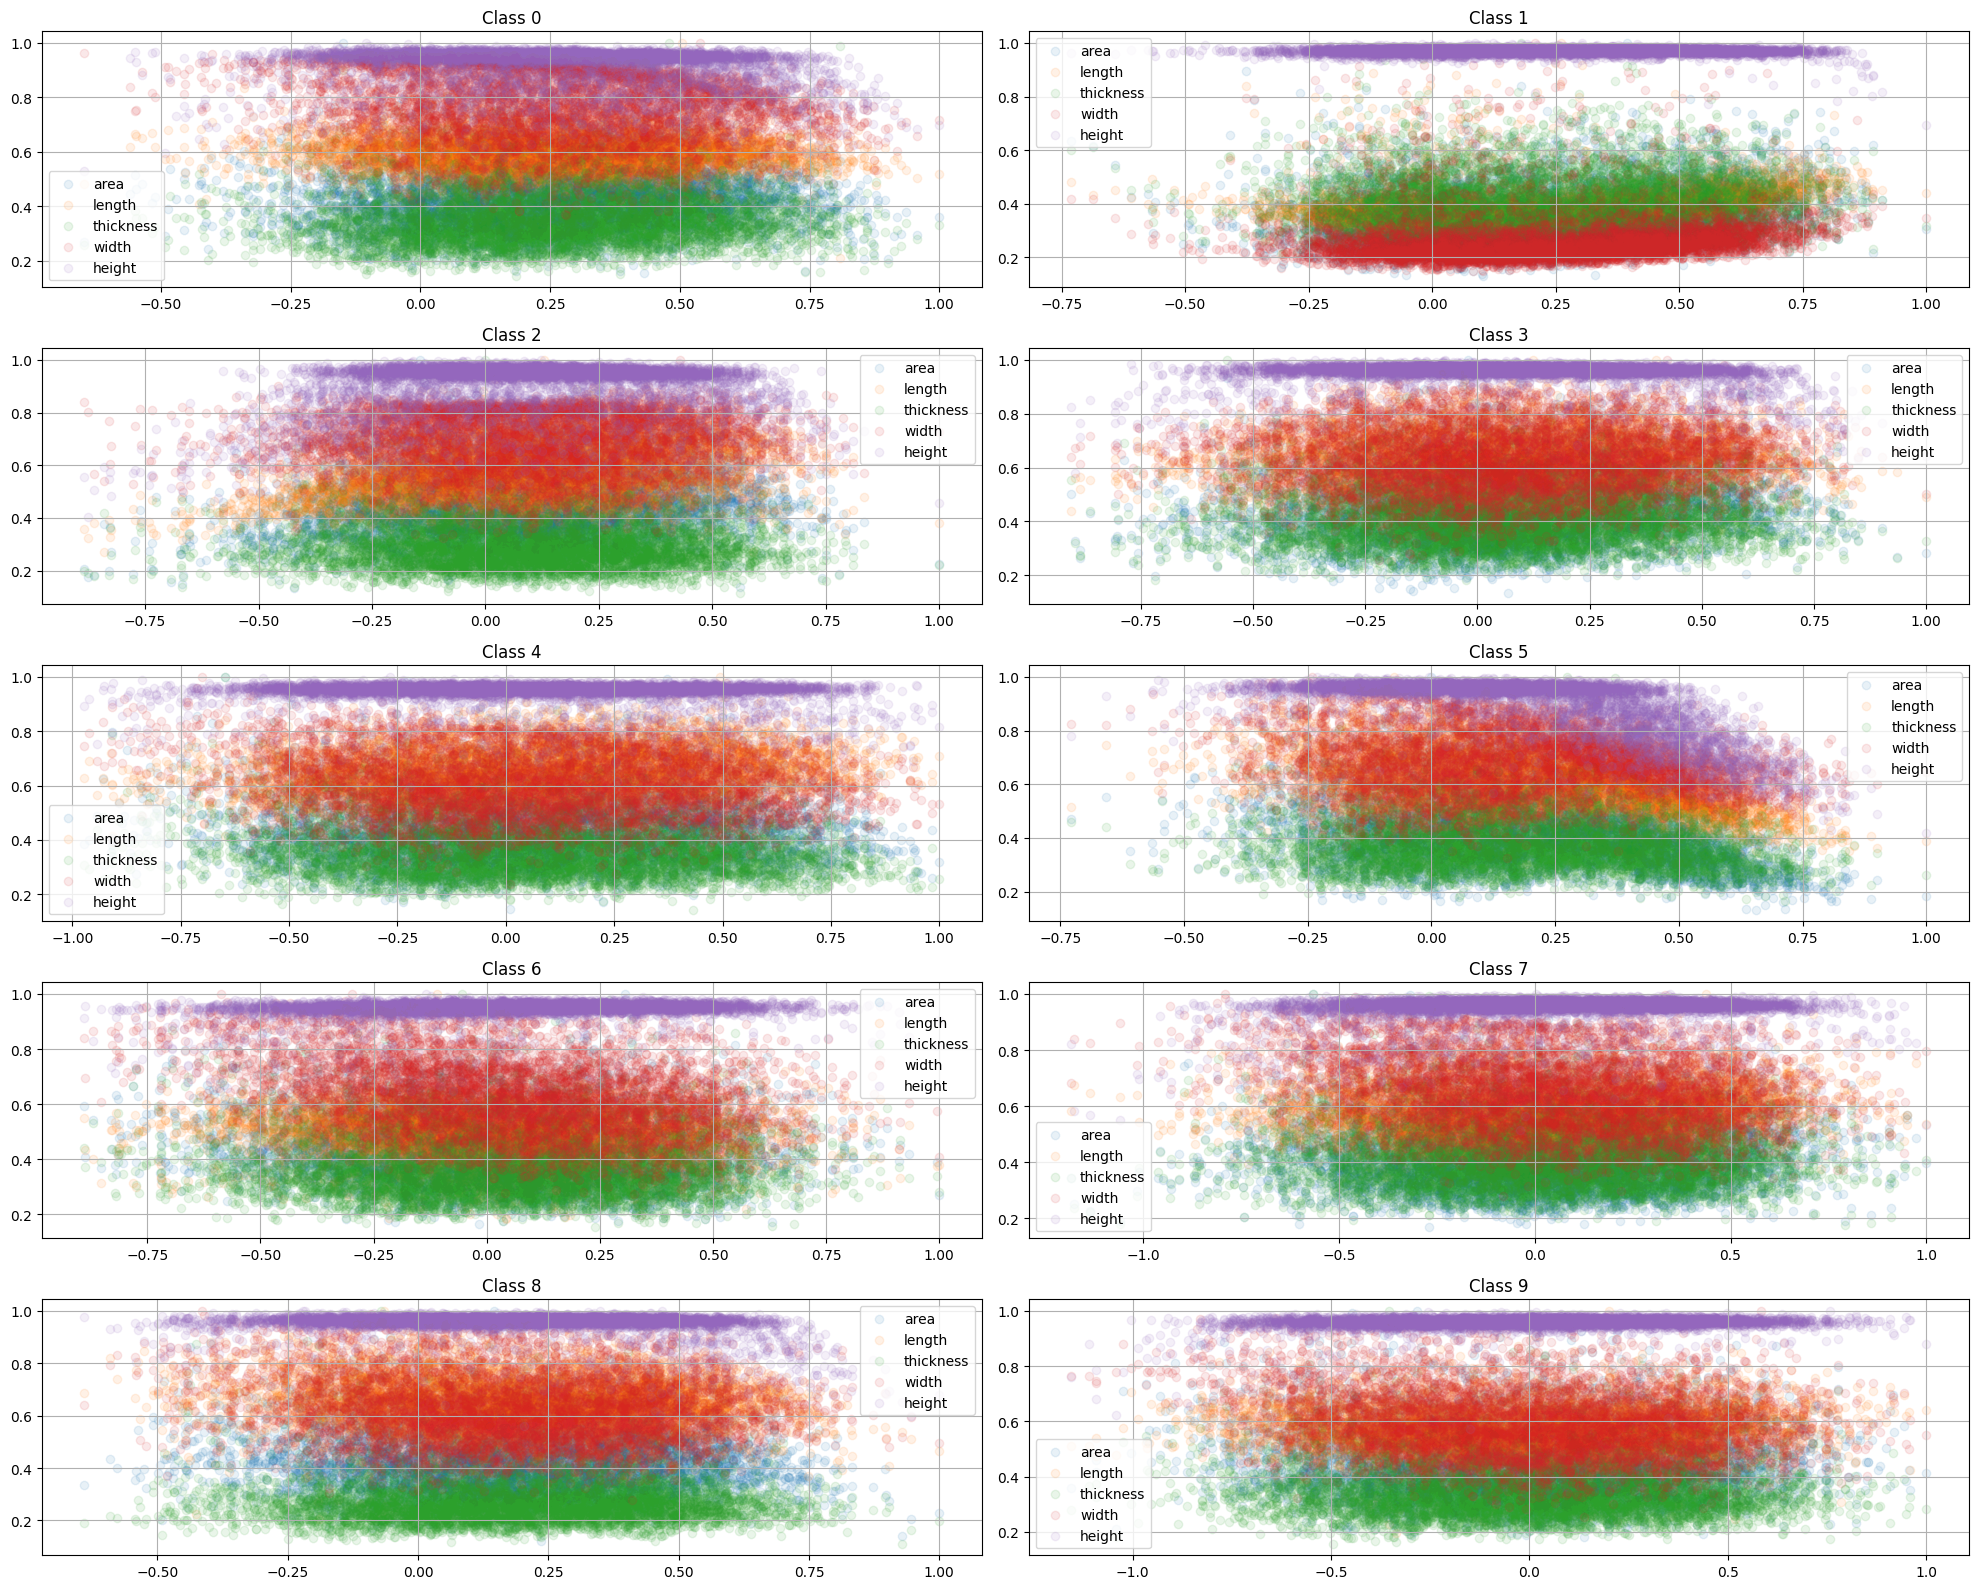

In [2]:
mnist_eda_plots(x_data=x_train, y_data=y_train, morpho_data=train_morpho)

Para b. graficar los embeddings obtenidos, intentar explicar lo obtenido.

Modelos: MLP con todas las opciones del punto 2.
Métricas a reportar: MAE.

In [8]:
model = create_fmnist_model(
        metrics=['mae'],
        loss='mae',
        hidden_layers=3,
        hidden_units=[512, 64, 64],
        weight_initializer='glorot_normal',
        weight_initializer_stddev=0.001,
        optimizer='Adam',
        activation='sigmoid',
        learning_rate=0.001,
        batch_normalization=True,
        dropout_rate=0.1,
        verbose=False
)

history, metrics_df, date_id = run_model(
        model,
        x_train,
        x_test,
        train_morpho["slant"].values,
        test_morpho["slant"].values,
        batch_size=256,
        max_epochs=100,
        batch_normalization=True,
        reduce_lr_config = {
            'monitor': 'val_mae',
            'factor': 0.2,
            'patience': 5,
            'min_lr': 0.00005
        },
        es_config = {
            'monitor': 'val_mae',
            'patience': 10,
            'mode': 'min',
            'restore_best_weights': True,
            'min_delta': 0.0
        },
        show_metrics=True,
        verbose=False
)

                   train           val
iterations  12288.000000  12288.000000
loss            0.019904      0.004953
lr              0.000050           NaN
mae             0.019904      0.004953


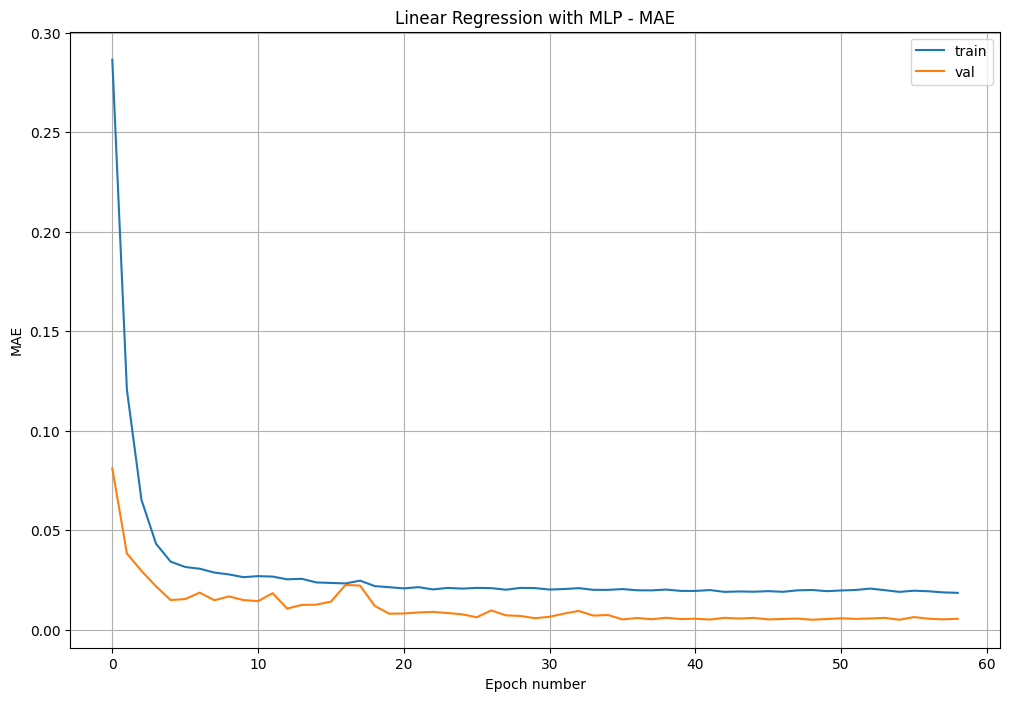

In [9]:
plt.figure(figsize=(12,8))
plt.plot(history.history["mae"], label="train") # Como usamos de loss el MAE, dan lo mismo
plt.plot(history.history["val_mae"], label="val")
plt.title("Linear Regression with MLP - MAE")
plt.xlabel("Epoch number")
plt.ylabel("MAE")
plt.legend()
plt.grid()
plt.show()

#### Learning Rate Sweep

In [ ]:
learning_rates = [0.0005, 0.001, 0.001, 0.002, 0.005, 0.007, 0.008, 0.01, 0.05, 0.1]
mae_arr_lr, val_mae_arr_lr, iterations_arr_lr = get_plot_data_vs_param(x_train=x_train,
                                                                       x_valid=x_test,
                                                                       y_train=train_morpho["slant"].values,
                                                                       y_valid=test_morpho["slant"].values,
                                                                       param_name='learning_rate', param_data=learning_rates) 
np.save('../plotting_data/lr', [learning_rates, mae_arr_lr, val_mae_arr_lr, iterations_arr_lr])

#### Batch Size Sweep

In [ ]:
batch_sizes = [8, 16, 32, 64, 128, 256, 512]
mae_arr_lr, val_mae_arr_lr, iterations_arr_lr = get_plot_data_vs_param(x_train=x_train,
                                                                       x_valid=x_test,
                                                                       y_train=train_morpho["slant"].values,
                                                                       y_valid=test_morpho["slant"].values,
                                                                       param_name='batch_size', param_data=batch_sizes) 
np.save('../plotting_data/bs', [learning_rates, mae_arr_lr, val_mae_arr_lr, iterations_arr_lr])

#### Optimizer Sweep

In [ ]:
optimizers = ['SGD', 'RMSprop', 'Adam', 'Nadam']
mae_arr_lr, val_mae_arr_lr, iterations_arr_lr = get_plot_data_vs_param(x_train=x_train,
                                                                       x_valid=x_test,
                                                                       y_train=train_morpho["slant"].values,
                                                                       y_valid=test_morpho["slant"].values,
                                                                       param_name='optimizer', param_data=optimizers) 
np.save('../plotting_data/opt', [learning_rates, mae_arr_lr, val_mae_arr_lr, iterations_arr_lr])

#### Activation Function Sweep

In [ ]:
activators = ['relu', 'leaky_relu', 'elu', 'sigmoid', 'tanh']
mae_arr_lr, val_mae_arr_lr, iterations_arr_lr = get_plot_data_vs_param(x_train=x_train,
                                                                       x_valid=x_test,
                                                                       y_train=train_morpho["slant"].values,
                                                                       y_valid=test_morpho["slant"].values,
                                                                       param_name='activation', param_data=activators) 
np.save('../plotting_data/act', [learning_rates, mae_arr_lr, val_mae_arr_lr, iterations_arr_lr])

#### Dropout Rate Sweep

In [ ]:
dropout_rates = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
mae_arr_lr, val_mae_arr_lr, iterations_arr_lr = get_plot_data_vs_param(x_train=x_train,
                                                                       x_valid=x_test,
                                                                       y_train=train_morpho["slant"].values,
                                                                       y_valid=test_morpho["slant"].values,
                                                                       param_name='dropout_rate', param_data=dropout_rates) 
np.save('../plotting_data/dr', [learning_rates, mae_arr_lr, val_mae_arr_lr, iterations_arr_lr])

#### Batch Normalization Y/N

In [ ]:
batch_normalizations = [False, True]
mae_arr_lr, val_mae_arr_lr, iterations_arr_lr = get_plot_data_vs_param(x_train=x_train,
                                                                       x_valid=x_test,
                                                                       y_train=train_morpho["slant"].values,
                                                                       y_valid=test_morpho["slant"].values,
                                                                       param_name='batch_normalization', param_data=batch_normalizations) 
np.save('../plotting_data/bn', [learning_rates, mae_arr_lr, val_mae_arr_lr, iterations_arr_lr])

#### Weight Initialization Sweep

In [ ]:
weight_initializers = ['glorot_normal', 'glorot_uniform', 'random_normal', 'random_uniform']
mae_arr_lr, val_mae_arr_lr, iterations_arr_lr = get_plot_data_vs_param(x_train=x_train,
                                                                       x_valid=x_test,
                                                                       y_train=train_morpho["slant"].values,
                                                                       y_valid=test_morpho["slant"].values,
                                                                       param_name='weight_initializer', param_data=weight_initializers) 
np.save('../plotting_data/wi', [learning_rates, mae_arr_lr, val_mae_arr_lr, iterations_arr_lr])

#### Loss Function Sweep

In [ ]:
losses = ['mse', 'mae']
mae_arr_lr, val_mae_arr_lr, iterations_arr_lr = get_plot_data_vs_param(x_train=x_train,
                                                                       x_valid=x_test,
                                                                       y_train=train_morpho["slant"].values,
                                                                       y_valid=test_morpho["slant"].values,
                                                                       param_name='loss', param_data=losses) 
np.save('../plotting_data/loss', [learning_rates, mae_arr_lr, val_mae_arr_lr, iterations_arr_lr])

### Plotting sweep results

In [ ]:
plot_sweep_results(metric='MAE', dir='../plotting_data')

In [ ]:
plot_sweep_results(metric='Iterations', dir='../plotting_data')